# Solving Timoshenko Beam Bending Problem using Physics-Informed Neural Networks (PINNs)

This notebook demonstrates the use of **Physics-Informed Neural Networks (PINNs)** to solve the Timoshenko beam bending problem. The Timoshenko beam theory considers both shear deformation and rotational effects, providing a more accurate description of beam bending, particularly for short or thick beams.

The notebook imports several functions and classes to implement the PINN approach: 

1) Governing Equations are the bending moment M_{xx} and the shear force Q_{x}: https://en.wikipedia.org/wiki/Timoshenko%E2%80%93Ehrenfest_beam_theory

2) The PINN implementation utilizes the mixed variable formulation for its output variables: https://arxiv.org/abs/2206.13103

3) Additionaly, we have elected to enforce the boundary conditions in a hard manner: https://arxiv.org/abs/2104.08426


In [2]:
import torch
import sys
import os

# Get the absolute path to the project root & add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from pde_class import Pde
from simple_pinn import PINN
from helper_functions import gradient, plot_loss, getData, getBoundaryData


iteration 0 resloss 1.57e+00
iteration 0 derivloss 6.16e+08


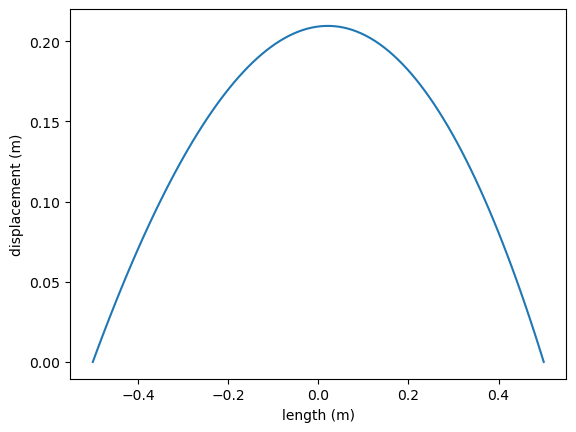

In [5]:
pde = Pde(E=1e8, nu=0.3, h=0.001, k=5/6, l=1.0, q = 1.0)
model = PINN([1, 20, 20, 20, 4], lr=1.0e-3, dist=True)

iterations = 1
report_step = 1000
rel_diff = 100.0

for i in range(iterations):
      model.optimizer.zero_grad()

      # Generate N collocation points
      x = getData(num_points=10, grad=True)

      # Generate N boundary points
      # xb =  getBoundaryData(num_points=10, grad=True)

      resloss, derivloss = pde.getLoss(model, x)

      loss = resloss + derivloss 
      loss.backward()

      model.optimizer.step()

      with torch.no_grad():
          if i % report_step ==0:
              print(f"iteration {i} resloss {resloss.item():.2e}")
              print(f"iteration {i} derivloss {derivloss.item():.2e}")
              plot_loss(model=model, eq=pde)
              print